In [39]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.applications import MobileNetV2

In [40]:
ds = tf.keras.utils.image_dataset_from_directory(
    './data/raw/Garbage classification/Garbage classification',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2527 files belonging to 6 classes.


In [41]:
ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [42]:
CLASS_NAMES = ds.class_names

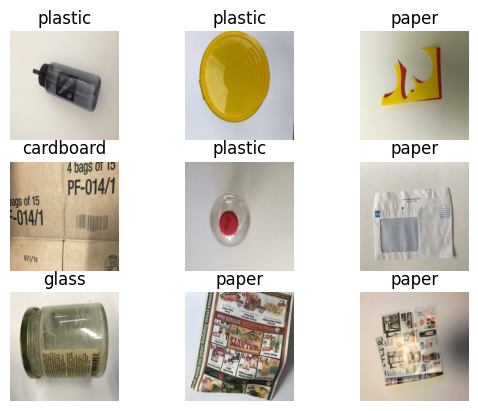

In [43]:
import matplotlib.pyplot as plt

for images, labels in ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(CLASS_NAMES[labels[i]])
        plt.axis("off")

In [44]:
DATASET_SIZE = 2527 / 32

In [45]:
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

In [46]:
train_dataset = ds.take(train_size)
rem = ds.skip(train_size)
test_dataset = rem.take(test_size)
val_dataset = rem.skip(test_size)


In [47]:
len(list(test_dataset))

11

In [48]:
NUM_CLASSES = len(CLASS_NAMES)

In [49]:
BATCH_SIZE = 32

In [50]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [51]:
base_model = keras.applications.MobileNetV2(
    weights="imagenet",
    input_shape=(256, 256, 3),
    include_top=False,
    classes=NUM_CLASSES
)

base_model.trainable = False

inputs = keras.Input(shape=(256, 256, 3))
x = inputs

x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(NUM_CLASSES)(x)
model = keras.Model(inputs, outputs)

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 6)                 7686      
                                                                 
Total params: 2265670 (8.64 MB)
Trainable params: 7686 (30.

In [52]:
model.compile(
    optimizer=keras.optimizers.legacy.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

epochs = 1




hist = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset, batch_size=32)

55/55 [==============================] - 15s 245ms/step - loss: 1.5065 - accuracy: 0.4131 - val_loss: 1.0762 - val_accuracy: 0.6386
